# How to create regular grids

In [1]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

This corresponds to a regular grid for CAMS-REG-v5.1

In [3]:
projection='regular'
lat_orig = 29.995
lon_orig = -30.0
inc_lat = 0.05
inc_lon = 0.1
n_lat = 840
n_lon = 900

In [4]:
nessy = nes.create_nes(comm=None, info=False, projection=projection,
                       lat_orig=lat_orig, lon_orig=lon_orig, inc_lat=inc_lat, inc_lon=inc_lon, 
                       n_lat=n_lat, n_lon=n_lon)

### Read projection

In [5]:
nessy.projection

<Other Coordinate Operation Transformer: longlat>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

In [6]:
nessy.projection_data

{'grid_mapping_name': 'latitude_longitude',
 'semi_major_axis': 6378137.0,
 'inverse_flattening': 0,
 'inc_lat': 0.05,
 'inc_lon': 0.1,
 'lat_orig': 29.995,
 'lon_orig': -30.0,
 'n_lat': 840,
 'n_lon': 900}

## 2. Plot

In [7]:
nessy.create_shapefile()

geometry
FID                                                      
0       POLYGON ((-30 29.995, -29.9 29.995, -29.9 30.0...
1       POLYGON ((-29.9 29.995, -29.8 29.995, -29.8 30...
2       POLYGON ((-29.8 29.995, -29.7 29.995, -29.7 30...
3       POLYGON ((-29.7 29.995, -29.6 29.995, -29.6 30...
4       POLYGON ((-29.6 29.995, -29.5 29.995, -29.5 30...
...                                                   ...
755995  POLYGON ((59.5 71.945, 59.6 71.945, 59.6 71.99...
755996  POLYGON ((59.6 71.945, 59.7 71.945, 59.7 71.99...
755997  POLYGON ((59.7 71.945, 59.8 71.945, 59.8 71.99...
755998  POLYGON ((59.8 71.945, 59.9 71.945, 59.9 71.99...
755999  POLYGON ((59.9 71.945, 60 71.945, 60 71.995, 5...

[756000 rows x 1 columns]

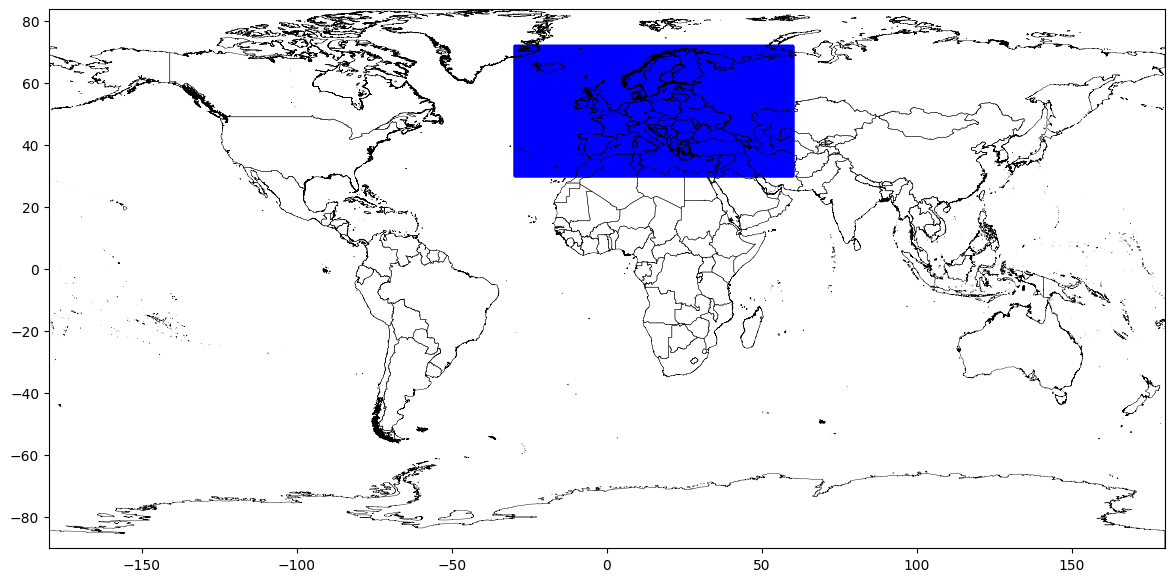

In [8]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor='blue', edgecolor='blue')
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [9]:
nessy.to_netcdf('regular_grid.nc', info=True)

Rank 000: Creating regular_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [10]:
nessy.to_shapefile('regular_grid_shp')

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3805: UserWarning: No vertical level has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3816: UserWarning: No time has been specified. The first one will be selected.
  warn(msg)
